In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## New Zealand data

In [ ]:
!pip install pyarrow

In [ ]:
nz_data = pd.read_feather("")
nz_data["terms"] = nz_data["terms"].astype(int)
nz_data = nz_data[nz_data["terms"] >= 50]

nz_data["date"] = pd.to_datetime(nz_data["date"]).dt.year

In [ ]:
nz_data["word_n_full"] = nz_data.apply(lambda row: len(row["text"].strip().split()), axis=1)

In [ ]:
sns.histplot(nz_data[nz_data["word_n_full"] >= 150]["date"]);
# sns.boxplot(nz_data["terms"]);

In [ ]:
nz_data_100 = nz_data[nz_data["word_n_full"] >= 100]
print(nz_data_100.value_counts("party"))
sns.histplot(nz_data_100["word_n_full"]);

In [ ]:
nz_data_150 = nz_data[nz_data["word_n_full"] >= 150]
print(nz_data_150.value_counts("party"))
sns.histplot(nz_data_150["word_n_full"]);

In [ ]:
nz_data_150.sort_values("terms", ascending=False, inplace=False)["text"].iloc[0]

In [ ]:
nz_data_150.sort_values("terms", ascending=False, inplace=False).head()

## UK data

In [3]:
uk_data = pd.read_feather("/home/hailinh/code/szaboildi/uk-pol-speech-classifier/raw_data/Corp_HouseOfCommons_V2.feather")

In [4]:
uk_data["terms"] = uk_data["terms"].astype(int)
uk_data = uk_data[uk_data["terms"] >= 50]
uk_data["word_n_full"] = uk_data.apply(lambda row: len(row["text"].strip().split()), axis=1)
uk_data["date"] = pd.to_datetime(uk_data["date"]).dt.year

In [5]:
uk_data["word_n_full"] = uk_data.apply(lambda row: len(row["text"].strip().split()), axis=1)

In [6]:
uk_data_150 = uk_data[uk_data["word_n_full"] >= 150]

In [7]:
uk_data_150.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True).iloc[9:]

,party,n_speeches
9,GPEW,475
10,other,400
11,APNI,125
12,Change UK,119
13,UPUP,90
14,UKUP,89
15,UKIP,76
16,Respect,73
17,SDP,69
18,The Independents,11


In [8]:
uk_data.head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full
0,1988,Queen's Speech,1,CHAIR,None,None,TRUE,74,I have to acquaint the House that this House h...,UK-HouseOfCommons,GBR,74
1,1988,First Day [Debate On The Address],2,CHAIR,None,None,TRUE,55,It may be for the convenience of the House if ...,UK-HouseOfCommons,GBR,55
2,1988,First Day [Debate On The Address],3,Giles Shaw,Con,1567,FALSE,2511,"I beg to move,. That an humble Address be pres...",UK-HouseOfCommons,GBR,2511
3,1988,First Day [Debate On The Address],4,John Maples,Con,1567,FALSE,1470,I am delighted to second the motion. When I ha...,UK-HouseOfCommons,GBR,1470
4,1988,First Day [Debate On The Address],5,Neil Kinnock,Lab,1516,FALSE,2768,I am sure that I speak for the majority of hon...,UK-HouseOfCommons,GBR,2768


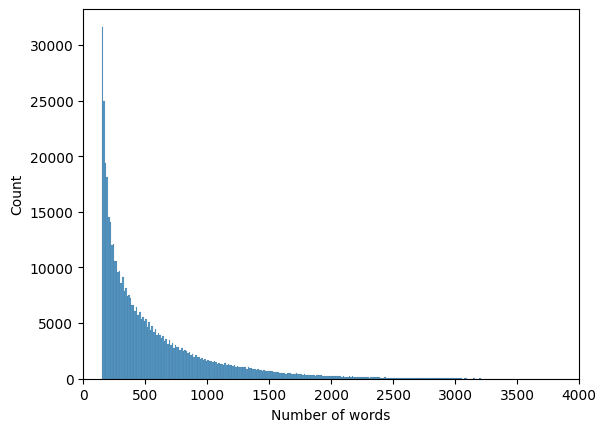

In [9]:
sns.histplot(uk_data_150["word_n_full"])
plt.xlim(0, 4000)
plt.xlabel('Number of words');

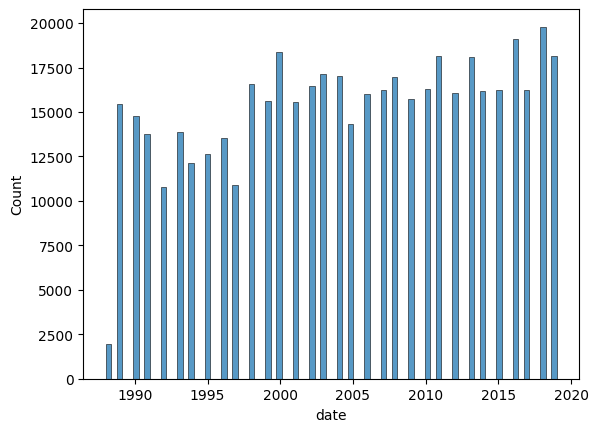

In [10]:
sns.histplot(uk_data_150["date"]);

In [11]:
uk_data_150.sort_values("word_n_full", ascending=False, inplace=False)["text"].iloc[0]

'It would be churlish of me not to offer a dollop of sympathy to my hon. Friend the Minister for Home Affairs and Devolution, Scottish Office, because he comes now to a debate on a subject on which there have already been 11 Adjournment debates. I know very well that he is responsible for an important White Paper tomorrow, but parliamentary good fortune seldom smiles on us. It is my good fortune, however, to have the time to deploy yet again an aspect of the case that is Lockerbie. I offer no apology for doing so, however, because the matter is not trivial. It is extremely important, not only for the relatives who want the truth about the death of their loved ones on 21 December 1988, but from the point of view of our country. Before charges were laid, my hon. Friend the Member for Clydesdale (Mr. Hood), who is present, several others and I went to Libya. Apart from anything else, we saw the importance of Libya to the British economy. It is an Arab country which is placing massive orde

In [12]:
uk_data_150.sort_values("word_n_full", ascending=False, inplace=False).head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full
492876,1997,Lockerbie [Orders Of The Day],343,Tam Dalyell,Lab,1516,FALSE,10936,It would be churlish of me not to offer a doll...,UK-HouseOfCommons,GBR,10936
817499,2003,Budget Statement,114,Gordon Brown,Lab,1516,FALSE,9069,It is half a century since a Budget has been p...,UK-HouseOfCommons,GBR,9069
759583,2002,Budget Statement,105,Gordon Brown,Lab,1516,FALSE,8957,"Five years ago, this Government's first Budget...",UK-HouseOfCommons,GBR,8957
986519,2006,None,139,Gordon Brown,Lab,1516,FALSE,8826,It is a great honour and privilege to deliver ...,UK-HouseOfCommons,GBR,8834
1299630,2011,Financial Statement,147,George Osborne,Con,1567,FALSE,8725,Last year's emergency Budget was about rescuin...,UK-HouseOfCommons,GBR,8725


In [13]:
uk_data_150.shape

(490090, 12)

In [14]:
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # remove whitespace
    sentence = sentence.strip()
    
    # lowercase characters
    sentence = sentence.lower()
    
    # remove numbers
    sentence = "".join([l for l in sentence if not l.isdigit()])
    
    # remove punctuation
    sentence = "".join([l for l in sentence if l not in string.punctuation])
    
    # tokenize
    tokens = word_tokenize(sentence)
    
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if w not in stop_words]
    
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # join tokens
    cleaned_sentence = " ".join(lemmatized_tokens)
    
    return cleaned_sentence

# Speeches with word_n_full < 150

In [15]:
# Filtering
uk_data_under_150 = uk_data[uk_data["word_n_full"] < 150]

In [16]:
uk_data_under_150.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'No!'

In [17]:
uk_data_under_150.sort_values("word_n_full", ascending=True, inplace=False).head(30)

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full
881676,2004,None,239,Patrick McLoughlin,Con,1567,FALSE,952,No!,UK-HouseOfCommons,GBR,1
284667,1993,None,112,Geoffrey Lofthouse,other,None,TRUE,298,Order.,UK-HouseOfCommons,GBR,1
973700,2006,None,248,Sylvia Heal,other,None,TRUE,98,Order.,UK-HouseOfCommons,GBR,1
621510,1999,None,326,Don Touhig,Lab,1516,FALSE,55,Monday next.,UK-HouseOfCommons,GBR,2
309949,1994,None,105,Michael Morris,other,None,TRUE,175,Not moved.,UK-HouseOfCommons,GBR,2
932367,2005,None,296,Sylvia Heal,other,None,TRUE,793,Objection taken.,UK-HouseOfCommons,GBR,2
997160,2006,None,283,Harry Cohen,Lab,1516,FALSE,63,"Yes, I am.",UK-HouseOfCommons,GBR,3
402998,1995,None,207,CHAIR,other,None,TRUE,51,Amendment (j) therefore falls.,UK-HouseOfCommons,GBR,4
310938,1994,None,188,CHAIR,other,None,TRUE,2080,I shall therefore put motion 5.,UK-HouseOfCommons,GBR,6
472795,1997,None,151,Janet Fookes,other,None,TRUE,67,Not moved. Read a Second time.,UK-HouseOfCommons,GBR,6


In [18]:
uk_data_under_150["clean_text"]=uk_data_under_150["text"].apply(preprocessing)

/tmp/ipykernel_151876/43381022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data_under_150["clean_text"]=uk_data_under_150["text"].apply(preprocessing)


In [19]:
uk_data_under_150["word_n_cleaned"] = uk_data_under_150.apply(lambda row: len(row["clean_text"].strip().split()), axis=1)

/tmp/ipykernel_151876/2327745737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data_under_150["word_n_cleaned"] = uk_data_under_150.apply(lambda row: len(row["clean_text"].strip().split()), axis=1)


# Speeches with words >= 150

In [20]:
# Preprocessing text
uk_data_150["clean_text"]=uk_data_150["text"].apply(preprocessing)

/tmp/ipykernel_151876/1952880090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data_150["clean_text"]=uk_data_150["text"].apply(preprocessing)


In [21]:
# Speech with 150 words
uk_data_150.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'I know my hon. Friend of old. He has a vice-that is what it is-of anticipating what I am about to say. I was about to come on to the Council of the Isles. I believe, as does my honourable and equally old Friend the Member for Kilmarnock and Loudoun (Mr. Browne), that the Council of the Isles may well have to examine the arrangements for what the hon. Member for Beaconsfield called concordats. My hon. Friends will not be surprised to hear me using the fisheries issue as an example. I promise not to dwell on that for long, but you will not allow me to anyway, Sir Alan. The issue of agreements is extremely important. It may be that the agreements entered into by the various assemblies and parliaments may one day require legal underpinning, but not by the nebulous idea raised by the hon. Member for Beaconsfield.'

In [22]:
# Speech with 150 words preprocessed, for example without stopwords
uk_data_150.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'know hon friend old vicethat isof anticipating say come council isle believe honourable equally old friend member kilmarnock loudoun mr browne council isle may well examine arrangement hon member beaconsfield called concordat hon friend surprised hear using fishery issue example promise dwell long allow anyway sir alan issue agreement extremely important may agreement entered various assembly parliament may one day require legal underpinning nebulous idea raised hon member beaconsfield'

In [23]:
uk_data_150["word_n_cleaned"] = uk_data_150.apply(lambda row: len(row["clean_text"].strip().split()), axis=1)

/tmp/ipykernel_151876/1645433038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data_150["word_n_cleaned"] = uk_data_150.apply(lambda row: len(row["clean_text"].strip().split()), axis=1)


In [24]:
uk_data_150.sort_values("word_n_full", ascending=True, inplace=False).head(30)

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full,clean_text,word_n_cleaned
552876,1998,Agency Arrangements Between Uk And Ni Departme...,318,Norman Godman,Lab,1516,FALSE,150,I know my hon. Friend of old. He has a vice-th...,UK-HouseOfCommons,GBR,150,know hon friend old vicethat isof anticipating...,69
190292,1991,Business Of The House,197,John Browne,Con,1567,FALSE,150,Further to what was said by the right hon. Mem...,UK-HouseOfCommons,GBR,150,said right hon member stokeontrent south mr as...,79
1559482,2014,Military Covenant,380,Robert Jenrick,Con,1567,FALSE,150,I am incredibly proud that this Government ens...,UK-HouseOfCommons,GBR,150,incredibly proud government enshrined military...,66
678914,2000,Transfer Schemes Made By Caa [Orders Of The Da...,157,Nick Raynsford,Lab,1516,FALSE,150,I have not visited the air traffic control cen...,UK-HouseOfCommons,GBR,150,visited air traffic control centre west drayto...,72
1098607,2008,Treaty of Lisbon (No. 7),349,William Hague,Con,1567,FALSE,150,"Yes, my hon. Friend is right. Of course it mea...",UK-HouseOfCommons,GBR,150,yes hon friend right course mean power compete...,71
1082563,2007,A303 Stonehenge Road Scheme,108,Tom Harris,Lab,1516,FALSE,150,"On the hon. Gentleman's final point, it is ent...",UK-HouseOfCommons,GBR,150,hon gentleman final point entirely regional tr...,70
1277370,2011,European Union Bill,295,Charlie Elphicke,Con,1567,FALSE,150,Underlying this entire debate about the Europe...,UK-HouseOfCommons,GBR,150,underlying entire debate european union sovere...,66
24144,1989,Middle East [Oral Answers To Questions > Forei...,35,Gerald Kaufman,Lab,1516,FALSE,150,"During his visit to Israel, did the hon. Gentl...",UK-HouseOfCommons,GBR,150,visit israel hon gentleman learn two week ago ...,69
888541,2004,Nhs Racism [Oral Answers To Questions > Health],71,John Reid,Lab,1516,FALSE,150,I agree with every word that my hon. Friend sa...,UK-HouseOfCommons,GBR,150,agree every word hon friend said know many yea...,67
1455209,2013,Finance (No. 2) Bill,349,Catherine McKinnell,Lab,1516,FALSE,150,I thank the Minister for his response and the ...,UK-HouseOfCommons,GBR,150,thank minister response completely fictional r...,70


In [25]:
uk_data_150_cleaned = uk_data_150[uk_data_150["word_n_full"] >= 150]
uk_data_150_cleaned.sort_values("word_n_cleaned", ascending=True).head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full,clean_text,word_n_cleaned
1479666,2013,Universal Credit,169,Iain Duncan Smith,Con,1567,FALSE,157,When I appeared before the hon. Lady's Committ...,UK-HouseOfCommons,GBR,157,appeared hon lady committee july clear change ...,52
1805997,2018,Ministry of Defence,391,Tobias Ellwood,Con,1567,FALSE,151,I can say it again and I think I am going to s...,UK-HouseOfCommons,GBR,151,say think going say bit later speech happy con...,52
1807636,2018,Leveson Inquiry,234,Matt Hancock,Con,1567,FALSE,151,"I do not know the answer to the last point, be...",UK-HouseOfCommons,GBR,151,know answer last point looking inquiry done to...,52
851009,2003,New Clause [Orders Of The Day > Sexual Offence...,314,Edward Garnier,Con,1567,FALSE,160,I know that the hon. Gentleman is not terribly...,UK-HouseOfCommons,GBR,160,know hon gentleman terribly interested practic...,52
968040,2005,None,142,Tony Blair,Lab,1516,FALSE,151,"On that last point, although it is obviously n...",UK-HouseOfCommons,GBR,151,last point although obviously issue statement ...,53


# Words 100 - 150 after cleaning

In [26]:
uk_data_100_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 100) & (uk_data_150["word_n_cleaned"] < 150)]

In [27]:
uk_data_100_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Con,39969
1,Lab,37968
2,LibDem,7354
3,SNP,2194
4,DUP,767
5,PlaidCymru,453
6,UUP,360
7,SDLP,301
8,Independent,166
9,GPEW,78


In [28]:
uk_data_100_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'I thank the Prime Minister and colleagues. Bills Presented Multinational Motor Manufacturing Companies (Duty of Care to Former Employees) Bill Presentation and First Reading (Standing Order No. 57) Geraint Davies, supported by Stephen Metcalfe, Mrs Sian C. James, Martin Caton, Mike Freer, Nia Griffiths, Jonathan Edwards, Dr Hywel Francis and Mr John Whittingdale presented a Bill to require multinational motor manufacturing companies to provide a duty of care to former employees in respect of pension provision. Bill read the First time; to be read a Second time on Friday 1 February 2013, and to be printed (Bill 107). Lords Spiritual Bill Presentation and First Reading (Standing Order No. 57) Mr Frank Field presented a Bill to make provision for filling vacancies among Lords Spiritual sitting and voting as Lords of Parliament. Bill read the First time; to be read a Second time on Friday 18 January 2013, and to be printed (Bill 108).'

In [29]:
uk_data_100_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'thank prime minister colleague bill presented multinational motor manufacturing company duty care former employee bill presentation first reading standing order geraint davy supported stephen metcalfe mr sian c james martin caton mike freer nia griffith jonathan edward dr hywel francis mr john whittingdale presented bill require multinational motor manufacturing company provide duty care former employee respect pension provision bill read first time read second time friday february printed bill lord spiritual bill presentation first reading standing order mr frank field presented bill make provision filling vacancy among lord spiritual sitting voting lord parliament bill read first time read second time friday january printed bill'

# Words 150 - 200 after cleaning

In [30]:
uk_data_150_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 150) & (uk_data_150["word_n_cleaned"] < 200)]

In [31]:
uk_data_150_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Con,27149
1,Lab,25372
2,LibDem,5450
3,SNP,1719
4,DUP,625
5,PlaidCymru,361
6,UUP,262
7,SDLP,206
8,Independent,104
9,GPEW,72


In [32]:
uk_data_150_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'I remind the House that I will be in the Chair today until about 11.30 am, or for as long as there are Members wishing to swear in. There will be a further opportunity for Members to swear in at 2.30 pm on Tuesday. Will Members wishing to take their seats please come to the Table? The following Members took and subscribed the Oath, or made and subscribed the Affirmation required by law: Carolyn Harris, for Swansea East Christina Elizabeth Rees, Neath Right honourable Liam Dominic Byrne, Birmingham, Hodge Hill Tania Wyn Mathias, Twickenham Mary Josephine Robinson, Cheadle Right honourable Owen William Paterson, North Shropshire Frank Zacharias Robin Goldsmith, Richmond Park Alex Chalk, Cheltenham Ruth Lauren Smeeth, Stoke-on-Trent North Wesley Paul William Streeting, Ilford North Peter John Kyle, Hove Rob Marris, Wolverhampton South West Rishi Sunak, Richmond (Yorks) Calum Robert Kerr, Berwickshire, Roxburgh and Selkirk Kelly Jane Tolhurst, Rochester and Strood Craig Mackinlay, South T

In [33]:
uk_data_150_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'remind house chair today long member wishing swear opportunity member swear pm tuesday member wishing take seat please come table following member took subscribed oath made subscribed affirmation required law carolyn harris swansea east christina elizabeth rees neath right honourable liam dominic byrne birmingham hodge hill tania wyn mathias twickenham mary josephine robinson cheadle right honourable owen william paterson north shropshire frank zacharias robin goldsmith richmond park alex chalk cheltenham ruth lauren smeeth stokeontrent north wesley paul william streeting ilford north peter john kyle hove rob marri wolverhampton south west rishi sunak richmond york calum robert kerr berwickshire roxburgh selkirk kelly jane tolhurst rochester strood craig mackinlay south thanet stephen nathan kinnock aberavon martin john docherty west dunbartonshire jeremy mark quin horsham robert ben lobban wallace wyre preston north matthew james offord hendon charles geoffrey cox torridge west devon

# Words 200 - 250 after cleaning

In [34]:
uk_data_200_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 200) & (uk_data_150["word_n_cleaned"] < 250)]

In [35]:
uk_data_200_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Con,20416
1,Lab,19061
2,LibDem,4202
3,SNP,1235
4,DUP,482
5,PlaidCymru,290
6,UUP,201
7,SDLP,160
8,Independent,84
9,GPEW,51


In [36]:
uk_data_200_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'With the leave of the House we will take motions 2 to 8 together. Ordered, Defence That Richard Benyon, Douglas Chapman, James Gray, Johnny Mercer, Mrs Madeleine Moon, Conor McGinn, Jim Shannon, Ruth Smeeth, John Spellar and Bob Stewart be members of the Defence Committee. Education That Lucy Allan, Ian Austin, Michelle Donelan, Marion Fellows, Suella Fernandes, Lucy Frazer, Kate Hollern, Ian Mearns, Caroline Nokes and Kate Osamor be members of the Education Committee. Justice That Richard Arkless, Richard Burgon, Alex Chalk, Alberto Costa, Philip Davies, Sue Hayman, John Howell, Victoria Prentis, Christina Rees and Nick Thomas-Symonds be members of the Justice Committee. Northern Ireland Affairs That Mr David Anderson, Oliver Colvile, Mr Nigel Evans, Mr Stephen Hepburn, Kate Hoey, Lady Hermon, Danny Kinahan, Jack Lopresti, Dr Alasdair McDonnell, Nigel Mills, Ian Paisley and Gavin Robinson be members of the Northern Ireland Affairs Committee. Public Adminstration and Constitutional Af

In [37]:
uk_data_200_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'leave house take motion together ordered defence richard benyon douglas chapman james gray johnny mercer mr madeleine moon conor mcginn jim shannon ruth smeeth john spellar bob stewart member defence committee education lucy allan ian austin michelle donelan marion fellow suella fernandes lucy frazer kate hollern ian mearns caroline nokes kate osamor member education committee justice richard arkless richard burgon alex chalk alberto costa philip davy sue hayman john howell victoria prentis christina rees nick thomassymonds member justice committee northern ireland affair mr david anderson oliver colvile mr nigel evans mr stephen hepburn kate hoey lady hermon danny kinahan jack lopresti dr alasdair mcdonnell nigel mill ian paisley gavin robinson member northern ireland affair committee public adminstration constitutional affair ronnie cowan oliver dowden paul flynn mr cheryl gillan kate hoey kelvin hopkins mr david jones gerald jones tom tugendhat mr andrew turner member public admini

# Words 250 - 300 after cleaning

In [38]:
uk_data_250_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 250) & (uk_data_150["word_n_cleaned"] < 300)]

In [39]:
uk_data_250_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Con,15700
1,Lab,15063
2,LibDem,3282
3,SNP,955
4,DUP,375
5,PlaidCymru,258
6,UUP,158
7,SDLP,126
8,Independent,86
9,GPEW,31


In [40]:
uk_data_250_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

"Division off. Question negatived. Clause 5 Powers to make supplemental provision Amendment proposed: 37,Â pageÂ 4,Â lineÂ 22, at end insert-â€˜(6A) The power under subsection (1) or (2) may not be exercised to amend, repeal, revoke or disapply-(a) this Part of this Act,(b) Public Libraries and Museums Act 1964 section 7 or section 13,(c) Small Holdings and Allotments Act 1908 section 23,(d) Children Act 1989 Part 3 and Schedule 2,(e) Childcare Act 2006, Parts 1 and 2,(f) Child Poverty Act 2010 Part 2,(g) Equality Act 2010, section 88,(h) Equality Act 2010, section 149,(i) Care Standards Act 2000,(j) Chronically Sick and Disabled Persons Act 1970 section 21,(k) Transport Act 2000 section 145A,(l) Local Authorities' Traffic Orders (Exemptions for Disabled Persons) (England) Regulations 2000,(m) Disabled Persons (Badges for Motor Vehicles) (England) (Amendment) Regulations 2007,(n) Disabled Persons (Badges for Motor Vehicles) (England) (Amendment No. 2) Regulations 2007,(o) Carers and Di

In [41]:
uk_data_250_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'division question negatived clause power make supplemental provision amendment proposed â pageâ â lineâ end insertâ€˜a power subsection may exercised amend repeal revoke disapplya part actb public library museum act section section c small holding allotment act section child act part schedule e childcare act part f child poverty act part g equality act section h equality act section care standard act j chronically sick disabled person act section k transport act section al local authority traffic order exemption disabled person england regulation disabled person badge motor vehicle england amendment regulation n disabled person badge motor vehicle england amendment regulation carers disabled child act p carers recognition service act q disabled person service consultation representation act r mental health act part community care service carers child service direct payment england regulation public health act u public health act v common act w countryside right way act x natural envir

# Words 300 - 350 after cleaning

In [42]:
uk_data_300_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 300) & (uk_data_150["word_n_cleaned"] < 350)]

In [43]:
uk_data_300_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Con,11940
1,Lab,11904
2,LibDem,2501
3,SNP,757
4,DUP,332
5,PlaidCymru,180
6,UUP,132
7,SDLP,104
8,Independent,67
9,GPEW,41


In [44]:
uk_data_300_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

'With the leave of the House, we will take motions 2 to 12 together. Ordered, Business, Innovation and Skills That Paul Blomfield, Richard Fuller, Peter Kyle, Amanda Milling, Amanda Solloway, Jo Stevens, Michelle Thomson, Kelly Tolhurst, Craig Tracey and Chris White be members of the Business, Innovation and Skills Committee. Culture, Media and Sport Bill Wiggin, on behalf of the Committee of Selection That Nigel Adams, Andrew Bingham, Damian Collins, Paul Farrelly, Nigel Huddleston, Ian C. Lucas, Jason McCartney, Christian Matheson, John Nicolson and Steve Rotheram be members of the Culture, Media and Sport Committee. Energy and Climate Change That Mr Alistair Carmichael, Glyn Davies, James Heappey, Ian Lavery, Melanie Onn, Matthew Pennycook, Dr Poulter, Antoinette Sandbach, Julian Sturdy and Dr Alan Whitehead be members of the Energy and Climate Change Committee. Environment, Food and Rural Affairs That Sarah Champion, Chris Davies, Jim Fitzpatrick, Harry Harpham, Simon Hart, Dr Paul

In [45]:
uk_data_300_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'leave house take motion together ordered business innovation skill paul blomfield richard fuller peter kyle amanda milling amanda solloway jo stevens michelle thomson kelly tolhurst craig tracey chris white member business innovation skill committee culture medium sport bill wiggin behalf committee selection nigel adam andrew bingham damian collins paul farrelly nigel huddleston ian c lucas jason mccartney christian matheson john nicolson steve rotheram member culture medium sport committee energy climate change mr alistair carmichael glyn davy james heappey ian lavery melanie onn matthew pennycook dr poulter antoinette sandbach julian sturdy dr alan whitehead member energy climate change committee environment food rural affair sarah champion chris davy jim fitzpatrick harry harpham simon hart dr paul monaghan rebecca pow m margaret ritchie david simpson rishi sunak member environment food rural affair committee foreign affair mr john baron ann clwyd mike gape stephen gethins mr mark 

# Words 350 - 400 after cleaning

In [46]:
uk_data_350_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 350) & (uk_data_150["word_n_cleaned"] < 400)]

In [47]:
uk_data_350_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Lab,9691
1,Con,9538
2,LibDem,2070
3,SNP,622
4,DUP,242
5,PlaidCymru,173
6,UUP,82
7,SDLP,81
8,Independent,54
9,GPEW,26


In [48]:
uk_data_350_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

"I beg to move, That this House has considered e-petition 212174 relating to pet theft. It is an honour to serve under your chairmanship, Mr Sharma. The pet theft petition was created by Dr Daniel Allen, who is in the Public Gallery. He is an animal geographer at Keele University and an animal welfare influencer. Last year, more and more families asked him to share stolen pet posters on Twitter, which he did. Feeling helpless because of the scale of the problem, anxious about the potential risks to his own dog, Rupert, and increasingly upset for the families involved, he teamed up with the Stolen and Missing Pets Alliance, known as SAMPA, to campaign for reform of the law on pet theft. Within four months, the pet theft petition achieved 100,000 signatures. SAMPA has been campaigning since September 2014. The founding members include Debbie Matthews, whom I have met, of Vets Get Scanning, Arnot Wilson of the Dog Union, Richard Jordan of Pet Theft Awareness and Jayne Hayes and Wayne May 

In [49]:
uk_data_350_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'beg move house considered epetition relating pet theft honour serve chairmanship mr sharma pet theft petition created dr daniel allen public gallery animal geographer keele university animal welfare influencer last year family asked share stolen pet poster twitter feeling helpless scale problem anxious potential risk dog rupert increasingly upset family involved teamed stolen missing pet alliance known sampa campaign reform law pet theft within four month pet theft petition achieved signature sampa campaigning since september founding member include debbie matthew met vet get scanning arnot wilson dog union richard jordan pet theft awareness jayne hayes wayne may dog lost last year sampa organised dog theft awareness day highlight growing crime devastating impact family westminster event hosted hon member dartford gareth johnson present debate championing reform law pet theft parliament many year dr daniel allen beverley cuddy recently become patron professor john cooper qc sampas leg

# Words 400 - 450 after cleaning

In [50]:
uk_data_400_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 400) & (uk_data_150["word_n_cleaned"] < 450)]

In [51]:
uk_data_400_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Lab,7875
1,Con,7414
2,LibDem,1577
3,SNP,486
4,DUP,183
5,PlaidCymru,128
6,UUP,104
7,SDLP,59
8,Independent,44
9,GPEW,26


In [52]:
uk_data_400_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

"I ask the Serjeant at Arms to investigate the delay in the No Lobby. The House having divided: Ayes 99, Noes 36. Division No. 201[8.26 pmAYESAmess, David Arbuthnot, Rt Hon James Atkinson, David (Bour'mth E) Atkinson, Peter (Hexham) Baker, Norman Ballard, Jackie Beggs, Roy Beith, Rt Hon A JBercow, John Blunt, Crispin Boswell, Tim Bottomley, Rt Hon Mrs Virginia Brady, Graham Brooke, Rt Hon Peter Browning, Mrs Angela Bruce, Ian (S Dorset) Burnett, John Butterfill, John Campbell, Rt Hon Menzies (NE Fife) Chapman, Sir Sydney (Chipping Barnet) Chope, Christopher Clarke, Rt Hon Kenneth (Rushcliffe) Colman, Tony Cormack, Sir Patrick Cotter, Brian Davey, Edward (Kingston) Davies, Quentin (Grantham) Day, Stephen Donohoe, Brian HDuncan, Alan Emery, Rt Hon Sir Peter Evans, Nigel Forth, Rt Hon Eric Foster, Don (Bath) Garnier, Edward Gill, Christopher Gillan, Mrs Cheryl Gray, James Greenway, John Grieve, Dominic Hamilton, Rt Hon Sir Archie Hawkins, Nick Hill, Keith Howarth, Gerald (Aldershot) Jack,

In [53]:
uk_data_400_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'ask serjeant arm investigate delay lobby house divided ayes no division pmayesamess david arbuthnot rt hon james atkinson david bourmth e atkinson peter hexham baker norman ballard jackie beggs roy beith rt hon jbercow john blunt crispin boswell tim bottomley rt hon mr virginia brady graham brooke rt hon peter browning mr angela bruce ian dorset burnett john butterfill john campbell rt hon menzies ne fife chapman sir sydney chipping barnet chope christopher clarke rt hon kenneth rushcliffe colman tony cormack sir patrick cotter brian davey edward kingston davy quentin grantham day stephen donohoe brian hduncan alan emery rt hon sir peter evans nigel forth rt hon eric foster bath garnier edward gill christopher gillan mr cheryl gray james greenway john grieve dominic hamilton rt hon sir archie hawkins nick hill keith howarth gerald aldershot jack rt hon michael jenkin bernard jenkins brian king andy rugby kenilworth king rt hon tom bridgwater kirkbride miss julie laing mr eleanor lansl

# Words 450 - 500 after cleaning

In [54]:
uk_data_450_cleaned = uk_data_150[(uk_data_150["word_n_cleaned"] >= 450) & (uk_data_150["word_n_cleaned"] < 500)]

In [55]:
uk_data_450_cleaned.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True)

,party,n_speeches
0,Lab,6311
1,Con,6009
2,LibDem,1213
3,SNP,371
4,DUP,162
5,PlaidCymru,98
6,UUP,77
7,SDLP,46
8,Independent,44
9,GPEW,14


In [56]:
uk_data_450_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["text"].iloc[0]

"I rise today to keep my promise to every year remember the women killed by male violence since the previous International Women's Day. As always, I owe the research of this list to Karen Ingala Smith and the Counting Dead Women project, which works in partnership with the Women's Aid â€œFemicide Censusâ€\x9d report. Women like Karen face a backlash for undertaking such research. After today, I will to be told that I do not care about men who have died, which is obviously ridiculous. Such a thing is never said to those who stand up and honour the men of this country. I am grateful that Karen Ingala Smith ignores this and remains on the side of the women who died, not the forces who want to ignore them. All these stories are in the public domain. As always, the women are of all ages and were killed in violent episodes at the hands of men. Violence against women and girls is an epidemic. If as many people died every week at a sporting event, or because they had a specific job, there woul

In [57]:
uk_data_450_cleaned.sort_values("word_n_full", ascending=True, inplace=False)["clean_text"].iloc[0]

'rise today keep promise every year remember woman killed male violence since previous international woman day always owe research list karen ingala smith counting dead woman project work partnership woman aid â€œfemicide censusâ€\x9d report woman like karen face backlash undertaking research today told care men died obviously ridiculous thing never said stand honour men country grateful karen ingala smith ignores remains side woman died force want ignore story public domain always woman age killed violent episode hand men violence woman girl epidemic many people died every week sporting event specific job would national outcry woman deserve must better hear story end culture male violence killed name annemarie james sabrina mullings sheila morgan tracey wilkinson kanwal williams vicki hull hannah bladon carolyn hill katrina evemy megan bill karolina chwiluk jane sherrat tracy kearns concepta leonard gemma leeming emma day mohanna abdhua marjorie cawdery sobhia khan romina kalachi aren

## Comprehensive

<Axes: xlabel='word_n_cleaned', ylabel='Count'>

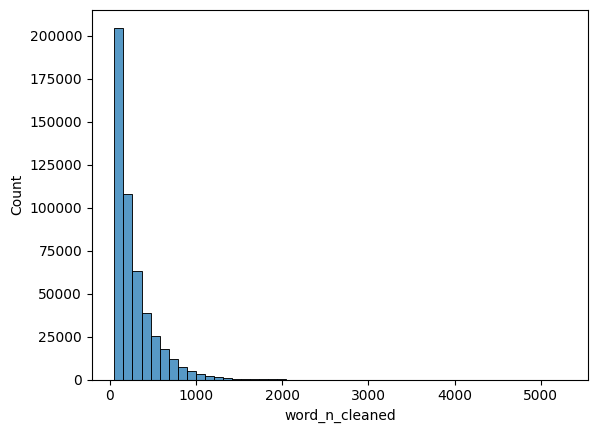

In [58]:
sns.histplot(uk_data_150["word_n_cleaned"], bins=50)

In [1]:
for i in range(150, 500, 50):
    temp_data = uk_data_150[(uk_data_150["word_n_cleaned"] >= i)]
    temp_data = temp_data.groupby("party").size().reset_index(name="n_speeches").\
    sort_values("n_speeches", ascending=False).reset_index(drop=True)
    print(i)
    display(temp_data[temp_data.n_speeches >= 1000])

NameError: name 'uk_data_150' is not defined